<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220627.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표 
* regressor

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as gg 
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta 
import os 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, mean_squared_error
import sklearn.datasets as skd

# Regressor

In [5]:
raw = skd.make_classification(n_samples = 10000, n_features = 10, n_classes = 2)
x, y = raw[0], raw[1]

In [8]:
x = pd.DataFrame(x, columns = list('abcdefghij'))

In [9]:
x.head()

,a,b,c,d,e,f,g,h,i,j
0,0.262615,-0.290075,-1.169506,-0.756462,-0.662913,1.193279,-1.848104,0.347903,2.671730,0.218137
1,0.970394,1.456600,0.971856,-0.401510,-0.549696,-1.655489,0.127844,-0.914742,0.949510,1.387494
2,0.283390,-0.467442,-0.802597,0.505517,0.478703,0.167299,0.304495,-0.258347,-0.855401,-1.181115
3,-0.387383,1.595486,-0.942423,-0.357852,0.037360,1.458426,-1.868815,0.207966,0.506854,-0.638916
4,1.089824,0.273331,1.045699,-0.035706,-0.024343,1.205109,-0.722966,0.163250,-0.611677,0.684543


In [10]:
res = [KMeans(n_clusters = a).fit(x).inertia_ for a in range(1, 10)]

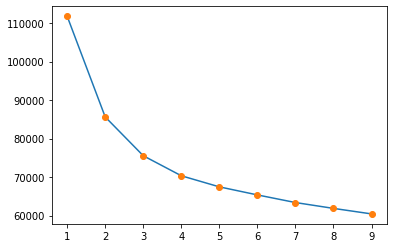

In [11]:
plt.plot(range(1, 10), res)
plt.plot(range(1, 10), res, 'o')

In [12]:
km = KMeans(n_clusters = 4).fit(x)

In [13]:
km.labels_

array([3, 1, 0, ..., 3, 0, 2], dtype=int32)

In [14]:
pca = PCA(n_components = 10)
fit_pca = pca.fit_transform(x)

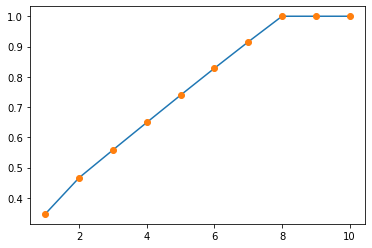

In [16]:
plt.plot(range(1, 11),pca.explained_variance_ratio_.cumsum())
plt.plot(range(1, 11),pca.explained_variance_ratio_.cumsum(), 'o')

In [20]:
fit_pca = pd.DataFrame(np.c_[fit_pca, y.reshape(-1,1), km.labels_], columns = [f'pc{a}' for a in range(1,11)] + ['y', 'cl'])
fit_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,y,cl
0,-0.445769,2.979745,0.901654,0.291493,0.754341,-0.777834,1.854652,-0.103805,-1.021638e-15,-1.762449e-15,0.0,3.0
1,-1.963214,0.425306,0.255786,0.141012,0.332384,1.836896,-0.959500,-1.525682,-1.287932e-16,-8.430785e-16,1.0,1.0
2,1.714452,-0.419499,-0.104828,0.623054,-0.301630,-0.229137,-0.297799,0.244438,1.095145e-14,5.619492e-15,0.0,0.0
3,0.891503,0.972307,-0.043446,-0.613946,1.411909,-1.078801,1.559398,-1.535216,5.249052e-16,-5.694505e-16,0.0,3.0
4,-0.880426,-1.027789,-0.056384,0.772143,-0.129190,-0.440872,1.318907,-0.848962,1.519902e-14,-2.726734e-15,0.0,2.0


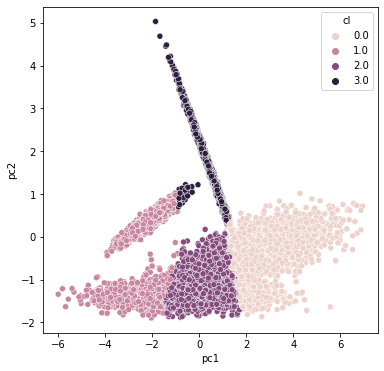

In [22]:
plt.figure(figsize = [6,6])
sns.scatterplot(data = fit_pca, x = 'pc1', y = 'pc2', hue = 'cl')

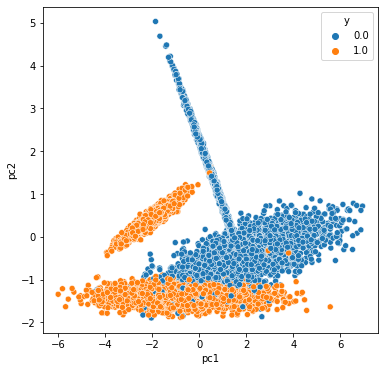

In [23]:
plt.figure(figsize = [6,6])
sns.scatterplot(data = fit_pca, x = 'pc1', y = 'pc2', hue = 'y')